## Загрузка набора данных

In [193]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import featuretools as ft
import re
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

df = pd.read_csv("../data/mobile phone price prediction.csv")

df.drop(["Unnamed: 0"], axis=1, inplace=True)
df["Price"] = df["Price"].str.replace(",", "").astype(float)

numerical_features = [
    "Ram",
    "Battery",
    "Display",
    "Camera",
]

for feature in numerical_features:
    df[feature] = df[feature].apply(
        lambda x: int(re.search(r"\d+", x).group()) if re.search(r"\d+", x) else None  # type: ignore
    )

df

Name  Rating  Spec_score  \
0                    Samsung Galaxy F14 5G    4.65          68   
1                       Samsung Galaxy A11    4.20          63   
2                       Samsung Galaxy A13    4.30          75   
3                       Samsung Galaxy F23    4.10          73   
4     Samsung Galaxy A03s (4GB RAM + 64GB)    4.10          69   
...                                    ...     ...         ...   
1365                               TCL 40R    4.05          75   
1366                 TCL 50 XL NxtPaper 5G    4.10          80   
1367                 TCL 50 XE NxtPaper 5G    4.00          80   
1368                    TCL 40 NxtPaper 5G    4.50          79   
1369                           TCL Trifold    4.65          93   

                                No_of_sim  Ram  Battery  Display  Camera  \
0           Dual Sim, 3G, 4G, 5G, VoLTE,     4     6000        6    50.0   
1               Dual Sim, 3G, 4G, VoLTE,     2     4000        6    13.0   
2               Dual Sim, 3G, 4G, VoLTE,     4     5000        6    50.0   
3               Dual Sim, 3G, 4G, VoLTE,     4     6000        6    48.0   
4               Dual Sim, 3G, 4G, VoLTE,     4     5000        6    13.0   
...                                   ...  ...      ...      ...     ...   
1365        Dual Sim, 3G, 4G, 5G, VoLTE,     4     5000        6    50.0   
1366            Dual Sim, 3G, 4G, VoLTE,     8     5000        6    50.0   
1367        Dual Sim, 3G, 4G, 5G, VoLTE,     6     5000        6    50.0   
1368        Dual Sim, 3G, 4G, 5G, VoLTE,     6     5000        6    50.0   
1369  Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G,    12     4600       10     NaN   

                                        External_Memory Android_version  \
0                      Memory Card Supported, upto 1 TB              13   
1                    Memory Card Supported, upto 512 GB              10   
2                      Memory Card Supported, upto 1 TB              12   
3                      Memory Card Supported, upto 1 TB              12   
4                      Memory Card Supported, upto 1 TB              11   
...                                                 ...             ...   
1365                               Memory Card (Hybrid)              12   
1366                               Memory Card (Hybrid)              14   
1367                   Memory Card Supported, upto 1 TB              13   
1368                   Memory Card Supported, upto 1 TB              13   
1369  50 MP + 48 MP + 8 MP Triple Rear &amp; 32 MP F...              13   

         Price  company   Inbuilt_memory       fast_charging  \
0       9999.0  Samsung   128 GB inbuilt   25W Fast Charging   
1       9990.0  Samsung    32 GB inbuilt   15W Fast Charging   
2      11999.0  Samsung    64 GB inbuilt   25W Fast Charging   
3      11999.0  Samsung    64 GB inbuilt                 NaN   
4      11999.0  Samsung    64 GB inbuilt   15W Fast Charging   
...        ...      ...              ...                 ...   
1365   18999.0      TCL    64 GB inbuilt   15W Fast Charging   
1366   24990.0      TCL   128 GB inbuilt   33W Fast Charging   
1367   23990.0      TCL   256 GB inbuilt   18W Fast Charging   
1368   22499.0      TCL   256 GB inbuilt   15W Fast Charging   
1369  119990.0      TCL   256 GB inbuilt   67W Fast Charging   

                                  Screen_resolution             Processor  \
0      2408 x 1080 px Display with Water Drop Notch   Octa Core Processor   
1             720 x 1560 px Display with Punch Hole     1.8 GHz Processor   
2      1080 x 2408 px Display with Water Drop Notch       2 GHz Processor   
3                                     720 x 1600 px             Octa Core   
4       720 x 1600 px Display with Water Drop Notch             Octa Core   
...                                             ...                   ...   
1365                                  720 x 1612 px             Octa Core   
1366                                 1200 x 24

## Бизнес-цели
1. Классифицировать мобильные устройства по ценовым категориям (например, бюджетные, средний класс, флагманы).
2. Определить, какие характеристики мобильных устройств наиболее сильно влияют на их рейтинг.

## Проверка на пропущенные значения

In [194]:
print("Пропущенные данные по каждому столбцу:")
print(df.isnull().sum())

Пропущенные данные по каждому столбцу:
Name                   0
Rating                 0
Spec_score             0
No_of_sim              0
Ram                    0
Battery                0
Display                0
Camera                79
External_Memory        0
Android_version      443
Price                  0
company                0
Inbuilt_memory        19
fast_charging         89
Screen_resolution      2
Processor             28
Processor_name         0
dtype: int64


In [195]:
df.dropna(inplace=True)
print(df.isnull().sum())

Name                 0
Rating               0
Spec_score           0
No_of_sim            0
Ram                  0
Battery              0
Display              0
Camera               0
External_Memory      0
Android_version      0
Price                0
company              0
Inbuilt_memory       0
fast_charging        0
Screen_resolution    0
Processor            0
Processor_name       0
dtype: int64


## Проверка на выбросы

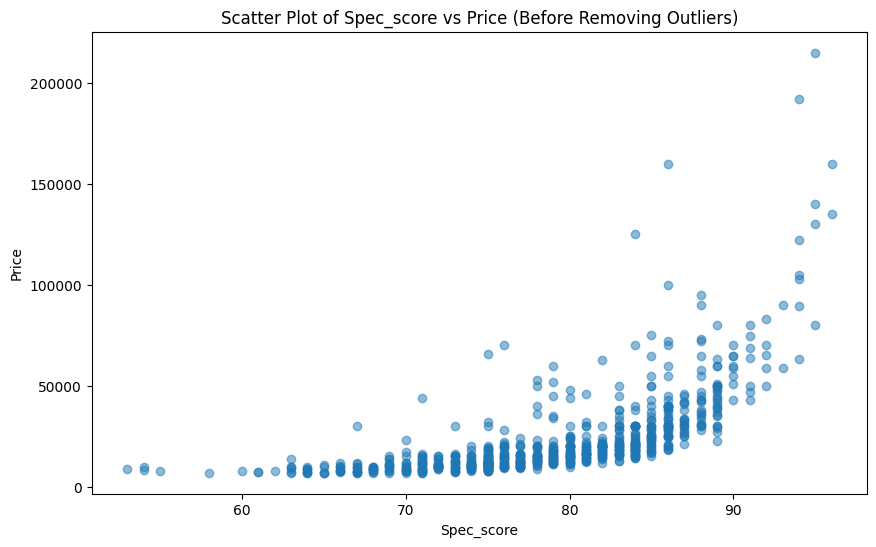

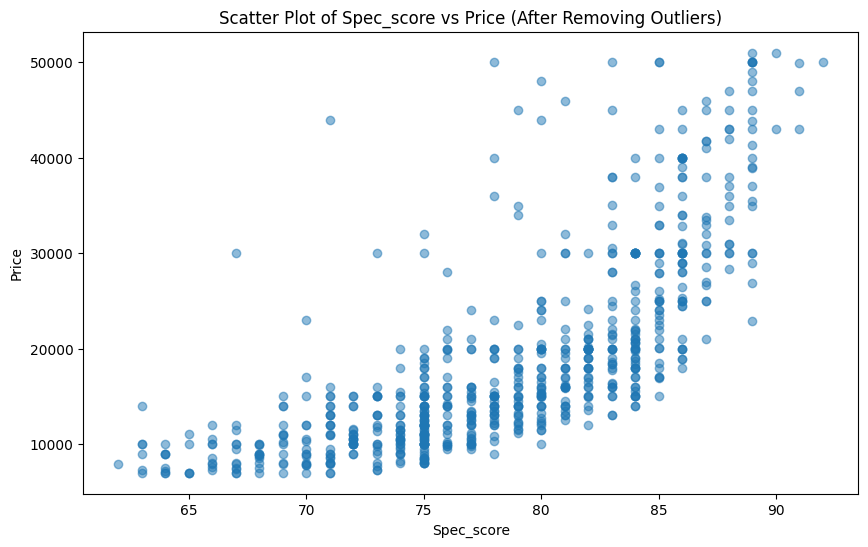

Количество строк до удаления выбросов: 785
Количество строк после удаления выбросов: 721


In [196]:
column1 = "Spec_score"
column2 = "Price"

plt.figure(figsize=(10, 6))
plt.scatter(df[column1], df[column2], alpha=0.5)
plt.xlabel(column1)
plt.ylabel(column2)
plt.title(f"Scatter Plot of {column1} vs {column2} (Before Removing Outliers)")
plt.show()

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_cleaned = df.copy()
for column in [column1, column2]:
    df_cleaned = remove_outliers(df_cleaned, column)

plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned[column1], df_cleaned[column2], alpha=0.5)
plt.xlabel(column1)
plt.ylabel(column2)
plt.title(f"Scatter Plot of {column1} vs {column2} (After Removing Outliers)")
plt.show()

print(f"Количество строк до удаления выбросов: {len(df)}")
print(f"Количество строк после удаления выбросов: {len(df_cleaned)}")

df = df_cleaned

## Разбиение данных на выборки.

In [197]:
X = df
y = df["company"]

train_df, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42
)
val_df, test_df, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print("Размеры выборок:")
print(f"Обучающая выборка: {train_df.shape[0]} записей")
print(train_df.company.value_counts())
print(f"Контрольная выборка: {val_df.shape[0]} записей")
print(val_df.company.value_counts())
print(f"Тестовая выборка: {test_df.shape[0]} записей")
print(test_df.company.value_counts())

Размеры выборок:
Обучающая выборка: 432 записей
company
Realme      86
Samsung     70
Motorola    50
Vivo        48
Xiaomi      45
Poco        32
OnePlus     15
iQOO        14
OPPO        12
POCO        11
Honor       11
TCL         11
Lava         9
Oppo         5
Huawei       5
itel         3
Google       2
Gionee       1
IQOO         1
Lenovo       1
Name: count, dtype: int64
Контрольная выборка: 144 записей
company
Vivo        27
Samsung     27
Realme      21
Xiaomi      12
Poco        11
Motorola    10
OnePlus      7
OPPO         6
POCO         6
Honor        3
itel         3
Lava         2
LG           2
iQOO         2
Lenovo       2
Oppo         1
Itel         1
Google       1
Name: count, dtype: int64
Тестовая выборка: 145 записей
company
Samsung     27
Vivo        25
Realme      16
Xiaomi      12
Motorola    11
Poco        10
OnePlus      7
TCL          7
iQOO         7
Huawei       5
Oppo         4
Lenovo       2
Honor        2
Lava         2
itel         2
Tecno        1
Goo

## Oversampling

In [198]:
def oversample(df):
    X = df.drop("company", axis=1)
    y = df["company"]

    oversampler = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X, y) # type: ignore

    resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_df

train_df_overs = oversample(train_df)
val_df_overs = oversample(val_df)
test_df_overs = oversample(test_df)

print("Размеры выборок:")
print(f"Обучающая выборка: {train_df_overs.shape[0]} записей")
print(train_df_overs.company.value_counts())
print(f"Контрольная выборка: {val_df_overs.shape[0]} записей")
print(val_df_overs.company.value_counts())
print(f"Тестовая выборка: {test_df_overs.shape[0]} записей")
print(test_df_overs.company.value_counts())

Размеры выборок:
Обучающая выборка: 1720 записей
company
Vivo        86
Motorola    86
Oppo        86
POCO        86
iQOO        86
Xiaomi      86
Realme      86
OnePlus     86
Poco        86
Samsung     86
TCL         86
Gionee      86
Honor       86
OPPO        86
Lava        86
itel        86
Huawei      86
Google      86
IQOO        86
Lenovo      86
Name: count, dtype: int64
Контрольная выборка: 486 записей
company
Vivo        27
Honor       27
Motorola    27
POCO        27
Samsung     27
itel        27
Lava        27
Xiaomi      27
Realme      27
OnePlus     27
Poco        27
iQOO        27
LG          27
Oppo        27
Itel        27
OPPO        27
Google      27
Lenovo      27
Name: count, dtype: int64
Тестовая выборка: 567 записей
company
Oppo        27
Huawei      27
Samsung     27
Motorola    27
TCL         27
Realme      27
Xiaomi      27
Poco        27
Google      27
Vivo        27
iQOO        27
Tecno       27
OnePlus     27
Honor       27
OPPO        27
Lenovo      27
La

## Дискретизация числовых признаков

In [199]:
numerical_features = ["Spec_score", "Battery", "Ram", "Camera"]

def discretize_features(df, features, bins=3, labels=False):
    for feature in features:
        try:
            df[f"{feature}_bin"] = pd.cut(df[feature], bins=bins, labels=labels) # type: ignore
        except Exception as e:
            print(f"Ошибка при дискретизации признака {feature}: {e}")
    return df

train_df_disc = discretize_features(train_df_overs, numerical_features)
val_df_disc = discretize_features(val_df_overs, numerical_features)
test_df_disc = discretize_features(test_df_overs, numerical_features)

train_df_disc

Name  Rating  Spec_score  \
0                            Vivo Y21T    3.95          74   
1                    Motorola Moto G23    4.40          77   
2                          Oppo A78 4G    4.25          81   
3     POCO M4 Pro 4G (8GB RAM + 128GB)    4.45          81   
4                       iQOO Z5 Pro 5G    4.40          84   
...                                ...     ...         ...   
1715     itel P55 5G (6GB RAM + 128GB)    4.00          75   
1716     itel P55 5G (6GB RAM + 128GB)    4.00          75   
1717     itel P55 5G (6GB RAM + 128GB)    4.00          75   
1718                     itel P55 Plus    4.10          74   
1719                          itel S24    4.35          75   

                          No_of_sim  Ram  Battery  Display  Camera  \
0         Dual Sim, 3G, 4G, VoLTE,     4     5000        6    50.0   
1         Dual Sim, 3G, 4G, VoLTE,     4     5000        6    50.0   
2         Dual Sim, 3G, 4G, VoLTE,     8     5000        6    50.0   
3         Dual Sim, 3G, 4G, VoLTE,     8     5000        6    64.0   
4     Dual Sim, 3G, 4G, 5G, VoLTE,     8     4500        6    64.0   
...                             ...  ...      ...      ...     ...   
1715  Dual Sim, 3G, 4G, 5G, VoLTE,     6     5000        6    50.0   
1716  Dual Sim, 3G, 4G, 5G, VoLTE,     6     5000        6    50.0   
1717  Dual Sim, 3G, 4G, 5G, VoLTE,     6     5000        6    50.0   
1718      Dual Sim, 3G, 4G, VoLTE,     8     5000        6    50.0   
1719             Dual Sim, 3G, 4G,     8     5000        6   108.0   

                         External_Memory Android_version  ...  \
0       Memory Card Supported, upto 1 TB              11  ...   
1     Memory Card Supported, upto 512 GB              13  ...   
2       Memory Card Supported, upto 1 TB              13  ...   
3       Memory Card Supported, upto 1 TB              11  ...   
4                   Memory Card (Hybrid)              11  ...   
...                                  ...             ...  ...   
1715    Memory Card Supported, upto 1 TB              13  ...   
1716    Memory Card Supported, upto 1 TB              13  ...   
1717    Memory Card Supported, upto 1 TB              13  ...   
1718    Memory Card Supported, upto 1 TB              13  ...   
1719               Memory Card Supported              13  ...   

       Inbuilt_memory       fast_charging Screen_resolution   Processor  \
0      128 GB inbuilt   18W Fast Charging     1600 x 720 px   Octa Core   
1      128 GB inbuilt   30W Fast Charging     720 x 1600 px   Octa Core   
2      128 GB inbuilt   67W Fast Charging    1080 x 2400 px   Octa Core   
3      128 GB inbuilt   33W Fast Charging    1080 x 2400 px   Octa Core   
4      128 GB inbuilt   65W Fast Charging    1080 x 2460 px   Octa Core   
...               ...                 ...               ...         ...   
1715   128 GB inbuilt   18W Fast Charging     1600 x 720 px   Octa Core   
1716   128 GB inbuilt   18W Fast Charging     1600 x 720 px   Octa Core   
1717   128 GB inbuilt   18W Fast Charging     1600 x 720 px   Octa Core   
1718   256 GB inbuilt   45W Fast Charging     720 x 1640 px   Octa Core   
1719   128 GB inbuilt   18W Fast Charging     720 x 1612 px   Octa Core   

       Processor_name   company Spec_score_bin  Battery_bin  Ram_bin  \
0     Snapdragon 680       Vivo              1            0        0   
1          Helio  G85  Motorola              1            0        0   
2      Snapdragon 680      Oppo              1            0        1   
3           Helio G96      POCO              1            0        1   
4      Snapdragon 870      iQOO              2            0        1   
...               ...       ...            ...          ...      ...   
1715   Dimensity 6080      itel              1            0        1   
1716   Dimensity 6080      itel              1            0        1   
1717   Dimensity 6080      itel              1            0        1   
1718      Unisoc T606      itel              1

## Унитарное кодирование категориальных признаков

In [200]:
categorical_features = ["Spec_score_bin", "Battery_bin", "Ram_bin", "Camera_bin"]

train_df_enc = pd.get_dummies(train_df_disc, columns=categorical_features)
val_df_enc = pd.get_dummies(val_df_disc, columns=categorical_features)
test_df_enc = pd.get_dummies(test_df_disc, columns=categorical_features)

train_df_enc

Name  Rating  Spec_score  \
0                            Vivo Y21T    3.95          74   
1                    Motorola Moto G23    4.40          77   
2                          Oppo A78 4G    4.25          81   
3     POCO M4 Pro 4G (8GB RAM + 128GB)    4.45          81   
4                       iQOO Z5 Pro 5G    4.40          84   
...                                ...     ...         ...   
1715     itel P55 5G (6GB RAM + 128GB)    4.00          75   
1716     itel P55 5G (6GB RAM + 128GB)    4.00          75   
1717     itel P55 5G (6GB RAM + 128GB)    4.00          75   
1718                     itel P55 Plus    4.10          74   
1719                          itel S24    4.35          75   

                          No_of_sim  Ram  Battery  Display  Camera  \
0         Dual Sim, 3G, 4G, VoLTE,     4     5000        6    50.0   
1         Dual Sim, 3G, 4G, VoLTE,     4     5000        6    50.0   
2         Dual Sim, 3G, 4G, VoLTE,     8     5000        6    50.0   
3         Dual Sim, 3G, 4G, VoLTE,     8     5000        6    64.0   
4     Dual Sim, 3G, 4G, 5G, VoLTE,     8     4500        6    64.0   
...                             ...  ...      ...      ...     ...   
1715  Dual Sim, 3G, 4G, 5G, VoLTE,     6     5000        6    50.0   
1716  Dual Sim, 3G, 4G, 5G, VoLTE,     6     5000        6    50.0   
1717  Dual Sim, 3G, 4G, 5G, VoLTE,     6     5000        6    50.0   
1718      Dual Sim, 3G, 4G, VoLTE,     8     5000        6    50.0   
1719             Dual Sim, 3G, 4G,     8     5000        6   108.0   

                         External_Memory Android_version  ...  \
0       Memory Card Supported, upto 1 TB              11  ...   
1     Memory Card Supported, upto 512 GB              13  ...   
2       Memory Card Supported, upto 1 TB              13  ...   
3       Memory Card Supported, upto 1 TB              11  ...   
4                   Memory Card (Hybrid)              11  ...   
...                                  ...             ...  ...   
1715    Memory Card Supported, upto 1 TB              13  ...   
1716    Memory Card Supported, upto 1 TB              13  ...   
1717    Memory Card Supported, upto 1 TB              13  ...   
1718    Memory Card Supported, upto 1 TB              13  ...   
1719               Memory Card Supported              13  ...   

      Spec_score_bin_2 Battery_bin_0 Battery_bin_1 Battery_bin_2 Ram_bin_0  \
0                False          True         False         False      True   
1                False          True         False         False      True   
2                False          True         False         False     False   
3                False          True         False         False     False   
4                 True          True         False         False     False   
...                ...           ...           ...           ...       ...   
1715             False          True         False         False     False   
1716             False          True         False         False     False   
1717             False          True         False         False     False   
1718             False          True         False         False     False   
1719             False          True         False         False     False   

     Ram_bin_1 Ram_bin_2  Camera_bin_0  Camera_bin_1  Camera_bin_2  
0        False     False          True         False         False  
1        False     False          True         False         False  
2         True     False          True         False         False  
3         True     False          True         False         False  
4         True     False          True         False         False  
...        ...       ...           ...           ...           ...  
1715      True     False          True         False         False  
1716      True     False          True         False         False  
1717      True     False          True         False         False  
1718      True     False          True  

## Ручной синтез признаков.

In [201]:
train_df_enc["Camera_to_Display_Ratio"] = (train_df_enc["Camera"] / train_df_enc["Display"])
val_df_enc["Camera_to_Display_Ratio"] = val_df_enc["Camera"] / val_df_enc["Display"]
test_df_enc["Camera_to_Display_Ratio"] = test_df_enc["Camera"] / test_df_enc["Display"]

train_df_enc

Name  Rating  Spec_score  \
0                            Vivo Y21T    3.95          74   
1                    Motorola Moto G23    4.40          77   
2                          Oppo A78 4G    4.25          81   
3     POCO M4 Pro 4G (8GB RAM + 128GB)    4.45          81   
4                       iQOO Z5 Pro 5G    4.40          84   
...                                ...     ...         ...   
1715     itel P55 5G (6GB RAM + 128GB)    4.00          75   
1716     itel P55 5G (6GB RAM + 128GB)    4.00          75   
1717     itel P55 5G (6GB RAM + 128GB)    4.00          75   
1718                     itel P55 Plus    4.10          74   
1719                          itel S24    4.35          75   

                          No_of_sim  Ram  Battery  Display  Camera  \
0         Dual Sim, 3G, 4G, VoLTE,     4     5000        6    50.0   
1         Dual Sim, 3G, 4G, VoLTE,     4     5000        6    50.0   
2         Dual Sim, 3G, 4G, VoLTE,     8     5000        6    50.0   
3         Dual Sim, 3G, 4G, VoLTE,     8     5000        6    64.0   
4     Dual Sim, 3G, 4G, 5G, VoLTE,     8     4500        6    64.0   
...                             ...  ...      ...      ...     ...   
1715  Dual Sim, 3G, 4G, 5G, VoLTE,     6     5000        6    50.0   
1716  Dual Sim, 3G, 4G, 5G, VoLTE,     6     5000        6    50.0   
1717  Dual Sim, 3G, 4G, 5G, VoLTE,     6     5000        6    50.0   
1718      Dual Sim, 3G, 4G, VoLTE,     8     5000        6    50.0   
1719             Dual Sim, 3G, 4G,     8     5000        6   108.0   

                         External_Memory Android_version  ...  Battery_bin_0  \
0       Memory Card Supported, upto 1 TB              11  ...           True   
1     Memory Card Supported, upto 512 GB              13  ...           True   
2       Memory Card Supported, upto 1 TB              13  ...           True   
3       Memory Card Supported, upto 1 TB              11  ...           True   
4                   Memory Card (Hybrid)              11  ...           True   
...                                  ...             ...  ...            ...   
1715    Memory Card Supported, upto 1 TB              13  ...           True   
1716    Memory Card Supported, upto 1 TB              13  ...           True   
1717    Memory Card Supported, upto 1 TB              13  ...           True   
1718    Memory Card Supported, upto 1 TB              13  ...           True   
1719               Memory Card Supported              13  ...           True   

     Battery_bin_1 Battery_bin_2 Ram_bin_0 Ram_bin_1 Ram_bin_2 Camera_bin_0  \
0            False         False      True     False     False         True   
1            False         False      True     False     False         True   
2            False         False     False      True     False         True   
3            False         False     False      True     False         True   
4            False         False     False      True     False         True   
...            ...           ...       ...       ...       ...          ...   
1715         False         False     False      True     False         True   
1716         False         False     False      True     False         True   
1717         False         False     False      True     False         True   
1718         False         False     False      True     False         True   
1719         False         False     False      True     False        False   

      Camera_bin_1  Camera_bin_2  Camera_to_Display_Ratio  
0            False         False                 8.333333  
1            False         False                 8.333333  
2            False         False                 8.333333  
3            False         False                10.666667  
4            False         False                10.666667  
...            ...           ...                      ...  
1715         False         False                 8.333333  
1716         False         False                 8.333333 

## Масштабирование признаков

In [202]:
scaler = StandardScaler()

numerical_features = [
    "Ram",
    "Battery",
    "Display",
    "Camera",
]

train_df_enc[numerical_features] = scaler.fit_transform(
    train_df_enc[numerical_features]
)
val_df_enc[numerical_features] = scaler.transform(val_df_enc[numerical_features])
test_df_enc[numerical_features] = scaler.transform(test_df_enc[numerical_features])

train_df_enc

Name  Rating  Spec_score  \
0                            Vivo Y21T    3.95          74   
1                    Motorola Moto G23    4.40          77   
2                          Oppo A78 4G    4.25          81   
3     POCO M4 Pro 4G (8GB RAM + 128GB)    4.45          81   
4                       iQOO Z5 Pro 5G    4.40          84   
...                                ...     ...         ...   
1715     itel P55 5G (6GB RAM + 128GB)    4.00          75   
1716     itel P55 5G (6GB RAM + 128GB)    4.00          75   
1717     itel P55 5G (6GB RAM + 128GB)    4.00          75   
1718                     itel P55 Plus    4.10          74   
1719                          itel S24    4.35          75   

                          No_of_sim       Ram   Battery   Display    Camera  \
0         Dual Sim, 3G, 4G, VoLTE,  -1.388963  0.206174  0.096622 -0.240789   
1         Dual Sim, 3G, 4G, VoLTE,  -1.388963  0.206174  0.096622 -0.240789   
2         Dual Sim, 3G, 4G, VoLTE,   0.720078  0.206174  0.096622 -0.240789   
3         Dual Sim, 3G, 4G, VoLTE,   0.720078  0.206174  0.096622  0.275662   
4     Dual Sim, 3G, 4G, 5G, VoLTE,   0.720078 -0.675789  0.096622  0.275662   
...                             ...       ...       ...       ...       ...   
1715  Dual Sim, 3G, 4G, 5G, VoLTE,  -0.334442  0.206174  0.096622 -0.240789   
1716  Dual Sim, 3G, 4G, 5G, VoLTE,  -0.334442  0.206174  0.096622 -0.240789   
1717  Dual Sim, 3G, 4G, 5G, VoLTE,  -0.334442  0.206174  0.096622 -0.240789   
1718      Dual Sim, 3G, 4G, VoLTE,   0.720078  0.206174  0.096622 -0.240789   
1719             Dual Sim, 3G, 4G,   0.720078  0.206174  0.096622  1.898794   

                         External_Memory Android_version  ...  Battery_bin_0  \
0       Memory Card Supported, upto 1 TB              11  ...           True   
1     Memory Card Supported, upto 512 GB              13  ...           True   
2       Memory Card Supported, upto 1 TB              13  ...           True   
3       Memory Card Supported, upto 1 TB              11  ...           True   
4                   Memory Card (Hybrid)              11  ...           True   
...                                  ...             ...  ...            ...   
1715    Memory Card Supported, upto 1 TB              13  ...           True   
1716    Memory Card Supported, upto 1 TB              13  ...           True   
1717    Memory Card Supported, upto 1 TB              13  ...           True   
1718    Memory Card Supported, upto 1 TB              13  ...           True   
1719               Memory Card Supported              13  ...           True   

     Battery_bin_1 Battery_bin_2 Ram_bin_0 Ram_bin_1 Ram_bin_2 Camera_bin_0  \
0            False         False      True     False     False         True   
1            False         False      True     False     False         True   
2            False         False     False      True     False         True   
3            False         False     False      True     False         True   
4            False         False     False      True     False         True   
...            ...           ...       ...       ...       ...          ...   
1715         False         False     False      True     False         True   
1716         False         False     False      True     False         True   
1717         False         False     False      True     False         True   
1718         False         False     False      True     False         True   
1719         False         False     False      True     False        False   

      Camera_bin_1  Camera_bin_2  Camera_to_Display_Ratio  
0            False         False                 8.333333  
1            False         False                 8.333333  
2            False         False                 8.333333  
3            False         False                10.666667  
4            False         False                10.666667  
...            ...           ...                      ...  
1715      

## Конструирование признаков с помощью Featuretools

In [203]:
es = ft.EntitySet(id="mobile_data")
es = es.add_dataframe(dataframe_name="train", dataframe=train_df_enc, index="id")
feature_matrix, feature_defs = ft.dfs(
    entityset=es, target_dataframe_name="train", max_depth=2
)

feature_defs

c:\Users\user\source\repos\mai_pi-33_zakharov\.venv\Lib\site-packages\featuretools\entityset\entityset.py:1733: UserWarning: index id not found in dataframe, creating new integer column
  warnings.warn(
c:\Users\user\source\repos\mai_pi-33_zakharov\.venv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\user\source\repos\mai_pi-33_zakharov\.venv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\user\source\repos\mai_pi-33_zakharov\.venv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling 

[<Feature: Rating>,
 <Feature: Spec_score>,
 <Feature: No_of_sim>,
 <Feature: Ram>,
 <Feature: Battery>,
 <Feature: Display>,
 <Feature: Camera>,
 <Feature: External_Memory>,
 <Feature: Android_version>,
 <Feature: Price>,
 <Feature: Inbuilt_memory>,
 <Feature: fast_charging>,
 <Feature: Screen_resolution>,
 <Feature: Processor>,
 <Feature: Processor_name>,
 <Feature: company>,
 <Feature: Spec_score_bin_0>,
 <Feature: Spec_score_bin_1>,
 <Feature: Spec_score_bin_2>,
 <Feature: Battery_bin_0>,
 <Feature: Battery_bin_1>,
 <Feature: Battery_bin_2>,
 <Feature: Ram_bin_0>,
 <Feature: Ram_bin_1>,
 <Feature: Ram_bin_2>,
 <Feature: Camera_bin_0>,
 <Feature: Camera_bin_1>,
 <Feature: Camera_bin_2>,
 <Feature: Camera_to_Display_Ratio>]